In [9]:
import math
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [58]:
X_train = [[0.01082764, 4.23545114],
       [4.79582793, 8.09990877],
       [1.43273459, 6.78909239],
       [6.65636646, 2.14087049],
       [1.1023028 , 3.54343784],
       [4.33816268, 9.41159263],
       [3.43549558, 4.13027302],
       [0.46447855, 2.69455965],
       [0.15923859, 0.43015364],
       [2.69642689, 7.05380441]]

In [59]:
y_train = [0, 1, 0, 1, 0, 1, 1, 0, 0, 1]

In [64]:
X_train = np.array(X_train)
y_train = np.array(y_train)
test = np.array([5.0, 6.0])

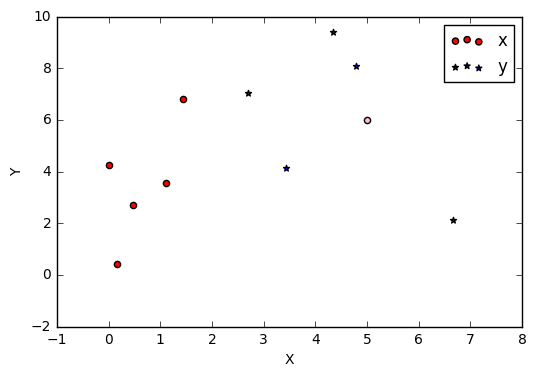

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c = 'red', marker='o', label = "x")
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c = 'blue', marker='*', label = "y")
ax.scatter(test[0], test[1], c = 'pink')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()
plt.show()

In [95]:
k = 6
distance = np.array([ math.sqrt( np.sum((x_train - test) ** 2) ) for x_train in X_train])
min_index = np.argsort(distance)[:k] # 获得前K个最小的距离的索引值
pred = y_train[min_index]
votes = Counter(pred)
pred_y = votes.most_common(1)[0][0]
pred_y

In [98]:
def KNN_classify(k, X_train, y_train, test):
    assert 1 <= k <= X_train.shape[0], "k must be vaild"
    assert X_train.shape[0] == y_train.shape[0], "the size of X_train must equal to the size of y_train"
    assert X_train.shape[1] == test.shape[1], "the feature number of test must be equal to X_train"
    
    distance = np.array([ math.sqrt( np.sum((x_train - test) ** 2) ) for x_train in X_train]) # 计算距离
    nearest = np.argsort(distance)[:k] # 获得前K个最小的距离的索引值
    topK_y = y_train[nearest]
    votes = Counter(topK_y)
    
    return votes.most_common(1)[0][0]

### 使用 Sklearn 中的 KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
KNN_classify = KNeighborsClassifier(n_neighbors=6)

In [102]:
KNN_classify.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [105]:
y_pred = KNN_classify.predict(test.reshape(1, -1))

In [106]:
y_pred[0]

1

### 调用自己封装的 KNN 

In [130]:
%run ./KNN.py

In [131]:
My_knn_classify = KNNClassify(k=6)

In [132]:
My_knn_classify.fit(X_train, y_train)

KNN(K=6)

In [133]:
test = test.reshape(1, -1)

In [134]:
pred = My_knn_classify.predict(test)

In [135]:
pred

array([1])